In [1]:
# import basic libraries for dataframe usage and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
## remove this cell before submitting

os.listdir()

['.ipynb_checkpoints',
 'SMS_Eligible_No_SMS_No_Show.ipynb',
 'sms_not_received_appointment_no_show.csv']

In [3]:
# this function will greatly simplify getting percentages based on condition
# this can be used as a template if you want to change the equality operator to inequality (>,<, etc..)
def column_percentage_calculator(df, column_name, condition):
    total_rows = df.shape[0]
    num_matched_rows = len(df.loc[(df[column_name] == condition)])
    percentage_matches_condition = (num_matched_rows / total_rows) * 100
    return percentage_matches_condition

## It can be assumed that each row that is in data frame was eligible to receive a SMS reminder as the csv it is based on contains only rows from the original dataset that were eligible to recieve SMS reminders.

In [4]:
# import df with pandas and visually inspect the head 
sms_not_received_appointment_no_show_df = pd.read_csv('sms_not_received_appointment_no_show.csv')
sms_not_received_appointment_no_show_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
0,M,28,0,0,0,0,0,0,1,10,4,Young Adult,2 - 30
1,F,57,0,0,0,0,0,0,1,41,4,Older Adult and Seniors,31 - 60
2,M,43,0,0,0,0,0,0,1,28,4,Adult,2 - 30
3,F,22,0,0,0,0,0,0,1,44,4,Young Adult,31 - 60
4,M,58,0,0,0,0,0,0,1,41,4,Older Adult and Seniors,31 - 60


In [5]:
sms_not_received_appointment_no_show_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
count,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.0,7988.0,7988.000000,7988.000000
mean,34.159114,0.112293,0.168378,0.064722,0.031923,0.013270,0.0,1.0,17.908738,1.768027
std,22.448033,0.315747,0.374225,0.246050,0.175806,0.114435,0.0,0.0,15.337473,1.538421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,2.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,6.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,13.000000,2.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,26.000000,3.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,90.000000,5.000000


In [6]:
# examine df structure
sms_not_received_appointment_no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 0 to 7987
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          7988 non-null   object
 1   Age             7988 non-null   int64 
 2   Scholarship     7988 non-null   int64 
 3   Hipertension    7988 non-null   int64 
 4   Diabetes        7988 non-null   int64 
 5   Alcoholism      7988 non-null   int64 
 6   Handicap        7988 non-null   int64 
 7   SMS_received    7988 non-null   int64 
 8   No-show         7988 non-null   int64 
 9   Days_Between    7988 non-null   int64 
 10  Day_Num         7988 non-null   int64 
 11  Age Group       7988 non-null   object
 12  Interval Group  7988 non-null   object
dtypes: int64(10), object(3)
memory usage: 811.4+ KB


# AGE

<AxesSubplot:ylabel='Frequency'>

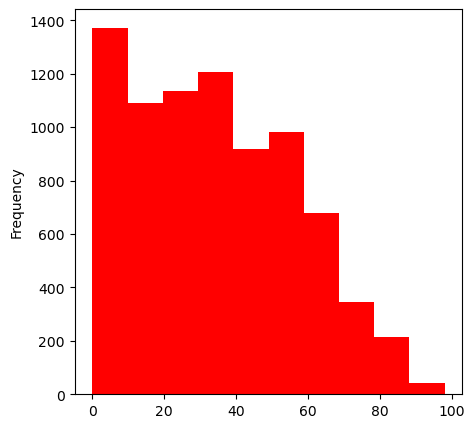

In [7]:
sms_not_received_appointment_no_show_df.Age.plot(kind='hist', figsize=(5,5), color='red')

In [8]:
# calculate the median age for appointments that DID RECEIVE SMS REMINDER BUT NO SHOW
age_median = sms_not_received_appointment_no_show_df.Age.median()
print('{} is the median age.'.format(age_median))

33.0 is the median age.


# DAYS_BETWEEN

<AxesSubplot:ylabel='Frequency'>

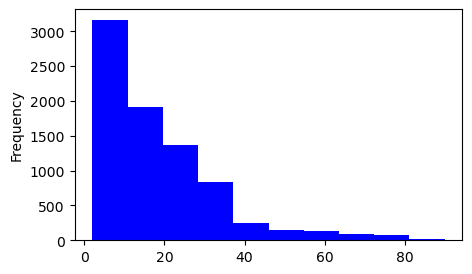

In [9]:
# visualize 'Days_Between' column distribution
sms_not_received_appointment_no_show_df.Days_Between.plot(kind='hist', figsize=(5,3), color='blue')

# GENDER

In [10]:
# calculate percent each gender that DID RECEIVE SMS REMINDER BUT NO SHOW' rows with column_percentage_calculator already defined
did_receive_SMS_no_show_male_percent = column_percentage_calculator(sms_not_received_appointment_no_show_df, 'Gender', 'M')
did_receive_SMS_no_show_female_percent = column_percentage_calculator(sms_not_received_appointment_no_show_df, 'Gender', 'F')
print('{}% of SMS-eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW were for male patients.'.format(round(did_receive_SMS_no_show_male_percent, 2)))
print('{}% of SMS-eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW were for female patients.'.format(round(did_receive_SMS_no_show_female_percent, 2)))

36.03% of SMS-eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW were for male patients.
63.97% of SMS-eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW were for female patients.


Text(0.5, 1.0, 'No-Show Gender Percentage')

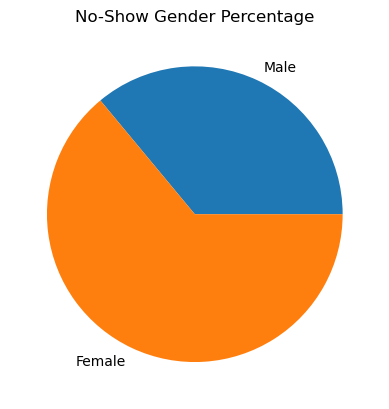

In [11]:
# visualize gender binary distribution
gender_percents = [did_receive_SMS_no_show_male_percent, did_receive_SMS_no_show_female_percent ]
labels = ['Male', 'Female']

fig, ax = plt.subplots()
ax.pie(gender_percents, labels = labels)
ax.set_title('No-Show Gender Percentage')

# INTERVAL GROUP

In [12]:
# obtain percentages of Interval Groups using the column_percentage_calculator function defined earlier 
two_to_thirty_percentage = column_percentage_calculator(sms_not_received_appointment_no_show_df, 'Interval Group', '2 - 30')
num_thirtyone_to_sixty_percentage = column_percentage_calculator(sms_not_received_appointment_no_show_df, 'Interval Group', '31 - 60')
num_sixtyone_to_ninety_percentage = column_percentage_calculator(sms_not_received_appointment_no_show_df, 'Interval Group', '61 - 90')

print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW scheduled between 2 and 30 days out ---> {}%'.format(round(two_to_thirty_percentage,2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW scheduled between 31 and 60 days out ---> {}%'.format(round(num_thirtyone_to_sixty_percentage, 2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW scheduled between 61 and 90 days out ---> {}%'.format(round(num_sixtyone_to_ninety_percentage, 2)))

Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW scheduled between 2 and 30 days out ---> 83.14%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW scheduled between 31 and 60 days out ---> 14.11%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW scheduled between 61 and 90 days out ---> 2.75%


<AxesSubplot:>

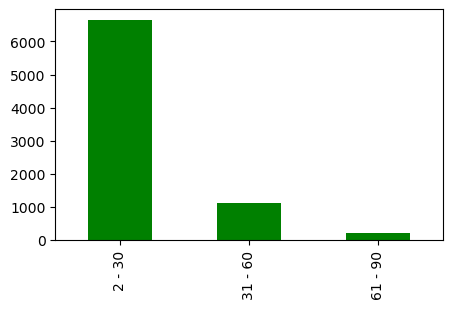

In [13]:
# visualize Interval Group categorical distribution in a bar plot
sms_not_received_appointment_no_show_df['Interval Group'].value_counts().plot(kind='bar', figsize =(5,3), color='green')

# AGE BRACKETS

In [14]:
# calculate percentage for age group categorical column values
sms_eligible_youth_percentage = column_percentage_calculator(sms_not_received_appointment_no_show_df, 'Age Group', 'Youth')
sms_eligible_young_adult_percentage = column_percentage_calculator(sms_not_received_appointment_no_show_df, 'Age Group', 'Young Adult')
sms_eligible_adult_percentage = column_percentage_calculator(sms_not_received_appointment_no_show_df, 'Age Group', 'Adult')
sms_eligible_older_adult_percentage = column_percentage_calculator(sms_not_received_appointment_no_show_df, 'Age Group', 'Older Adult and Seniors')

print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW for Youths {}%'.format(round(sms_eligible_youth_percentage, 2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW for Young Adults {}%'.format(round(sms_eligible_young_adult_percentage, 2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW for Adults {}%'.format(round(sms_eligible_adult_percentage, 2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW for Older Adults and Seniors {}%'.format(round(sms_eligible_older_adult_percentage, 2)))

Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW for Youths 29.42%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW for Young Adults 26.41%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW for Adults 24.61%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER AND NO SHOW for Older Adults and Seniors 19.55%


<AxesSubplot:>

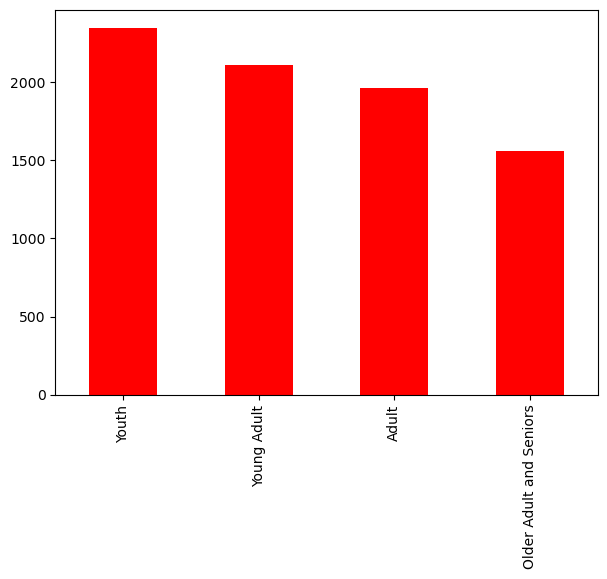

In [15]:
# create basic viz for age brackets/buckets
sms_not_received_appointment_no_show_df['Age Group'].value_counts().plot(kind='bar', figsize=(7,5), color='red')

# CONDITIONS

__As each 'condition' is it's own column and the values are only binary (0 for no, 1 for yes), the percentages for these variables WRT to all ROWS THAT DID NOT RECEIVE SMS REMINDER AND NO SHOW AT THE APPOINTMENT was obtained from the .describe() command and its output above. These values and respective labels will be used to visualize these variables on a bar graph.__

[Text(0, 0, 'Handicap'),
 Text(1, 0, 'Alcoholism'),
 Text(2, 0, 'Diabetes'),
 Text(3, 0, 'Scholarship Program'),
 Text(4, 0, 'Hypertension')]

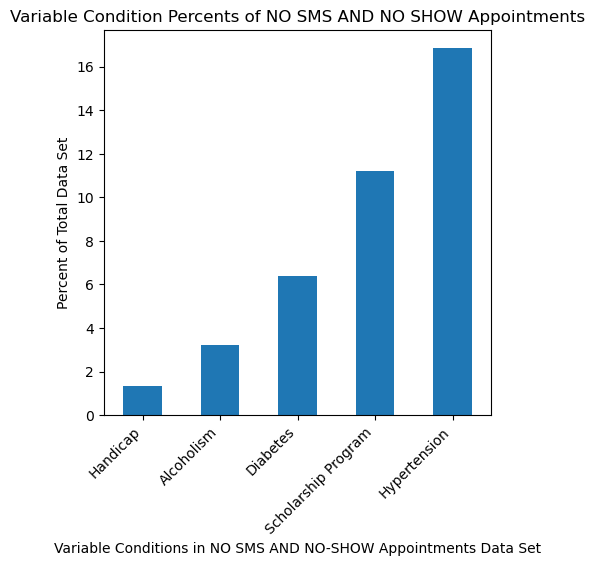

In [18]:
# create pandas series to graph and list of respective labels
condition_percents = pd.Series([1.33,  3.2, 6.40, 11.22, 16.84])
labels = ['Handicap', 'Alcoholism', 'Diabetes', 'Scholarship Program', 'Hypertension']


# plot graph of variable condition percentages
plt.figure(figsize=(5,5))
ax = condition_percents.plot(kind='bar')
ax.set_title('Variable Condition Percents of NO SMS AND NO SHOW Appointments')
ax.set_xlabel('Variable Conditions in NO SMS AND NO-SHOW Appointments Data Set')
ax.set_ylabel('Percent of Total Data Set')
ax.set_xticklabels(labels, rotation=45, ha='right')

# These are descriptive statistics of ROWS THAT DID NOT RECEIVE SMS REMINDER AND WERE NO-SHOW AT THE APPOINTMENT

- __The average age for NO SMS-RECEIVED and NO-SHOW appointments is 34 (34.15 rounded).__
- __The median age for NO SMS-RECEIVED and NO-SHOW appointments is 33.__
- __The average time between the ScheduledDay and AppointmentDay for NO SMS-RECEIVED and NO-SHOW appointments is 18 (17.9 rounded) days.__
- __Approximately 11.22% of NO SMS-RECEIVED and NO-SHOW appointments are for patients enrolled in the 'scholarship' program (explained earlier in analysis).__
- __Approximately 16.84% of NO SMS-RECEIVED and NO-SHOW are for patients suffering from hipertension (hypertension).__
- __Approximately 6.40% of NO SMS-RECEIVED and NO-SHOW are for patients suffering from diabetes.__
- __Approximately 3.20% of NO SMS-RECEIVED and NO-SHOW are for patients suffering from alcoholism.__
- __Approximately 1.33% of NO SMS-RECEIVED and NO-SHOW are for patients identifying as handicapped.__
- __Approximately 36.03% of NO SMS-RECEIVED and NO-SHOW rows were for appointments for male patients.__
- __Approximately 63.97% of NO SMS-RECEIVED and NO-SHOW elibible rows were for appointments for female patients.__
- __Approximately 29.42% of NO SMS-RECEIVED and NO-SHOW for Youths.__
- __Approximately 26.41% of NO SMS-RECEIVED and NO-SHOW for Young Adults.__ 
- __Approximately 24.61% of NO SMS-RECEIVED and NO-SHOW for Adults.__
- __Approximately 19.55% of NO SMS-RECEIVED and NO-SHOW for Older Adults and Seniors.__ 
- __Approximately 83.14%% of NO SMS-RECEIVED and NO-SHOW were scheduled between 2 and 30 days out.__
- __Approximately 14.11% of NO SMS-RECEIVED and NO-SHOW scheduled between 31 and 60 days out.__
- __Approximately 2.75% of NO SMS-RECEIVED and NO-SHOW scheduled between 61 and 90 days out.__

In [17]:
1==1

True

# This is the end of this section of EDA for ROWS THAT DID NOT RECEIVE SMS REMINDER AND WERE NO-SHOW AT THE APPOINTMENT